### Graph Convolutional Networks: Introduction to GNNs

https://towardsdatascience.com/graph-convolutional-networks-introduction-to-gnns-24b3f60d6c95

In [1]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Let’s import the dataset with PyG’s built-in function and try to understand the Datasets object it uses.

In [2]:
from torch_geometric.datasets import KarateClub

In [3]:
# Import dataset from PyTorch Geometric
dataset = KarateClub()

In [4]:
# Print information
print(dataset)
print('------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

KarateClub()
------------
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [5]:
data = dataset[0]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [6]:
# Print first element
print(f'Graph: {dataset[0]}')

Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [7]:
data = dataset[0]

In [8]:
print(f'x = {data.x.shape}')
print(data.x)

x = torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [9]:
print(f'edge_index = {data.edge_index.shape}')
print(data.edge_index)

edge_index = torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3, 

The adjacency matrix can be inferred from the edge_index with a utility function to_dense_adj().

In [10]:
from torch_geometric.utils import to_dense_adj

In [11]:
A = to_dense_adj(data.edge_index)[0].numpy().astype(int)
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [12]:
print(f'y = {data.y.shape}')
print(data.y)

y = torch.Size([34])
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


In [13]:
print(f'train_mask = {data.train_mask.shape}')
print(data.train_mask)

train_mask = torch.Size([34])
tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])


The train mask shows which nodes are supposed to be used for training with True statements. These nodes represent the training set, while the others can be considered as the test set. This division helps in model evaluation by providing unseen data for testing.

In [14]:
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


Let’s plot our dataset with a different color for each group.

In [15]:
from torch_geometric.utils import to_networkx

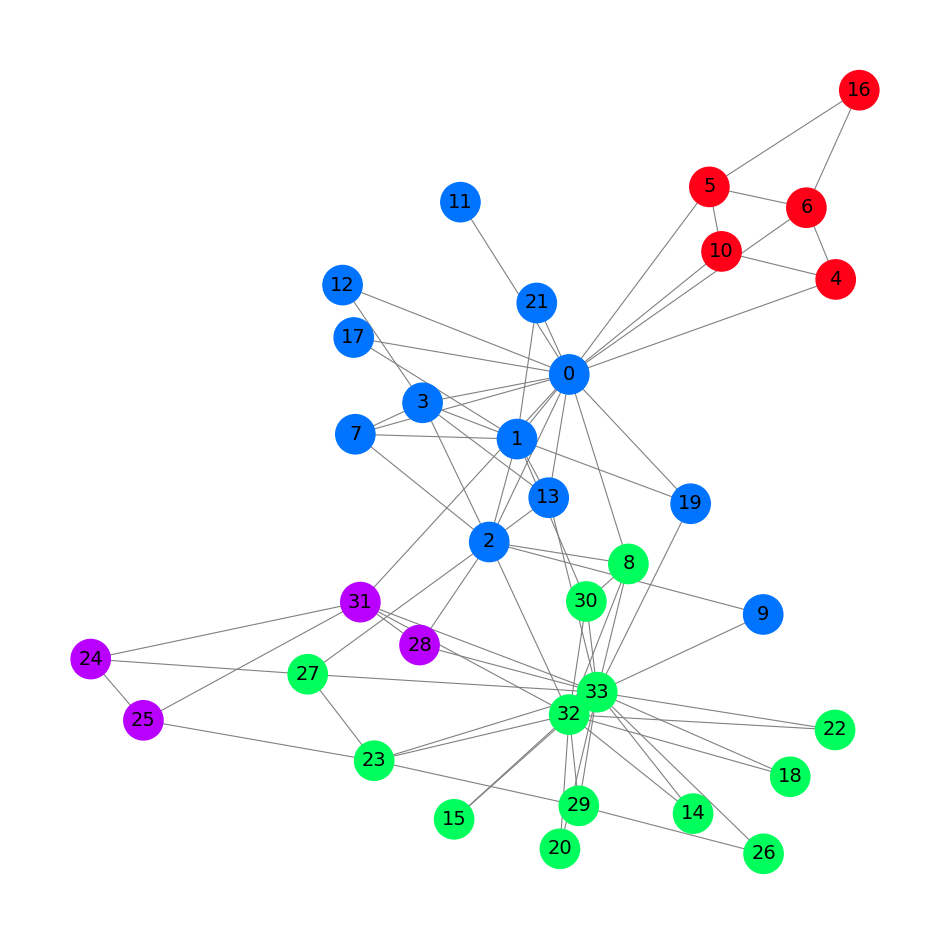

In [16]:
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

In [17]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv


In [18]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = Linear(3, dataset.num_classes)
    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z
model = GCN()
print(model)

GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [19]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

In [20]:
# Calculate accuracy
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)
# Data for animations
embeddings = []
losses = []
accuracies = []
outputs = []
# Training loop
for epoch in range(201):
    # Clear gradients
    optimizer.zero_grad()
    # Forward pass
    h, z = model(data.x, data.edge_index)
    # Calculate loss function
    loss = criterion(z, data.y)
    # Calculate accuracy
    acc = accuracy(z.argmax(dim=1), data.y)
    # Compute gradients
    loss.backward()
    # Tune parameters
    optimizer.step()
    # Store data for animations
    embeddings.append(h)
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))
    # Print metrics every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')


Epoch   0 | Loss: 1.30 | Acc: 35.29%
Epoch  10 | Loss: 1.19 | Acc: 73.53%
Epoch  20 | Loss: 1.01 | Acc: 73.53%
Epoch  30 | Loss: 0.73 | Acc: 88.24%
Epoch  40 | Loss: 0.46 | Acc: 88.24%
Epoch  50 | Loss: 0.31 | Acc: 88.24%
Epoch  60 | Loss: 0.24 | Acc: 88.24%
Epoch  70 | Loss: 0.19 | Acc: 97.06%
Epoch  80 | Loss: 0.14 | Acc: 100.00%
Epoch  90 | Loss: 0.09 | Acc: 100.00%
Epoch 100 | Loss: 0.06 | Acc: 100.00%
Epoch 110 | Loss: 0.04 | Acc: 100.00%
Epoch 120 | Loss: 0.03 | Acc: 100.00%
Epoch 130 | Loss: 0.03 | Acc: 100.00%
Epoch 140 | Loss: 0.02 | Acc: 100.00%
Epoch 150 | Loss: 0.02 | Acc: 100.00%
Epoch 160 | Loss: 0.01 | Acc: 100.00%
Epoch 170 | Loss: 0.01 | Acc: 100.00%
Epoch 180 | Loss: 0.01 | Acc: 100.00%
Epoch 190 | Loss: 0.01 | Acc: 100.00%
Epoch 200 | Loss: 0.01 | Acc: 100.00%


In [21]:
%%capture
from IPython.display import HTML
from matplotlib import animation
plt.rcParams["animation.bitrate"] = 3000

In [28]:
import matplotlib as mpl
mpl.rcParams['animation.writer'] = 'ffmpeg'

In [31]:
def animate(i):
    G = to_networkx(data, to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=True,
                    node_size=800,
                    node_color=outputs[i],
                    cmap="hsv",
                    vmin=-2,
                    vmax=3,
                    width=0.8,
                    edge_color="grey",
                    font_size=14
                    )
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=20)

MovieWriter imagemagick unavailable; using Pillow instead.


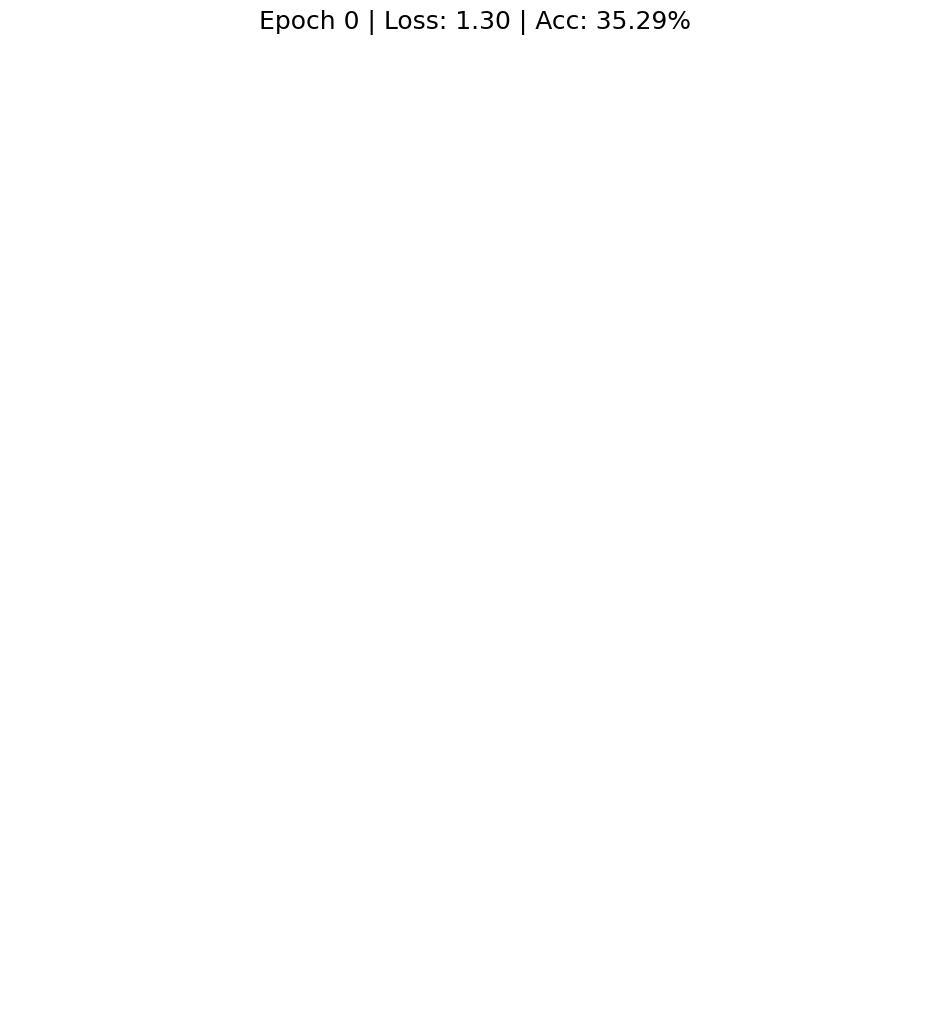

In [45]:
fig = plt.figure(figsize=(12, 12))
plt.axis('off')

anim = animation.FuncAnimation(fig, animate, \
            np.arange(0, 200, 10), interval=5000, repeat=True)

# Save the animation as a GIF
anim.save("animation.gif", writer='imagemagick', fps=30, bitrate=3000)

# Optionally, display the GIF in Jupyter Notebook
from IPython.display import Image
# display(Image(filename="animation.gif"))

In [37]:
# Print embeddings
print(f'Final embeddings = {h.shape}')
print(h)

Final embeddings = torch.Size([34, 3])
tensor([[6.7161e-01, 2.4065e+00, 0.0000e+00],
        [0.0000e+00, 2.9888e+00, 8.5007e-01],
        [2.6817e-02, 2.2835e+00, 1.4554e+00],
        [1.8661e-01, 2.7931e+00, 6.2042e-01],
        [2.7235e+00, 2.5972e-01, 3.7944e-04],
        [2.9352e+00, 3.1821e-02, 0.0000e+00],
        [2.9368e+00, 3.8620e-02, 0.0000e+00],
        [5.4555e-01, 2.4249e+00, 9.9836e-01],
        [3.3246e-03, 9.0711e-01, 2.9132e+00],
        [2.9394e-01, 2.1187e+00, 1.3653e+00],
        [2.8391e+00, 2.7073e-01, 3.7193e-05],
        [7.5487e-01, 2.4756e+00, 1.1091e+00],
        [6.3156e-01, 2.3832e+00, 8.1878e-01],
        [4.2687e-01, 2.2333e+00, 1.2638e+00],
        [0.0000e+00, 5.5129e-01, 2.9676e+00],
        [9.7394e-05, 4.9943e-01, 2.9026e+00],
        [2.7208e+00, 0.0000e+00, 1.5645e-03],
        [7.7691e-01, 2.3955e+00, 1.1394e+00],
        [0.0000e+00, 5.3334e-01, 3.0317e+00],
        [5.6883e-01, 2.1918e+00, 1.3441e+00],
        [3.2067e-04, 4.5213e-01, 2.9162e+

In [38]:
# Get first embedding at epoch = 0
embed = h.detach().cpu().numpy()

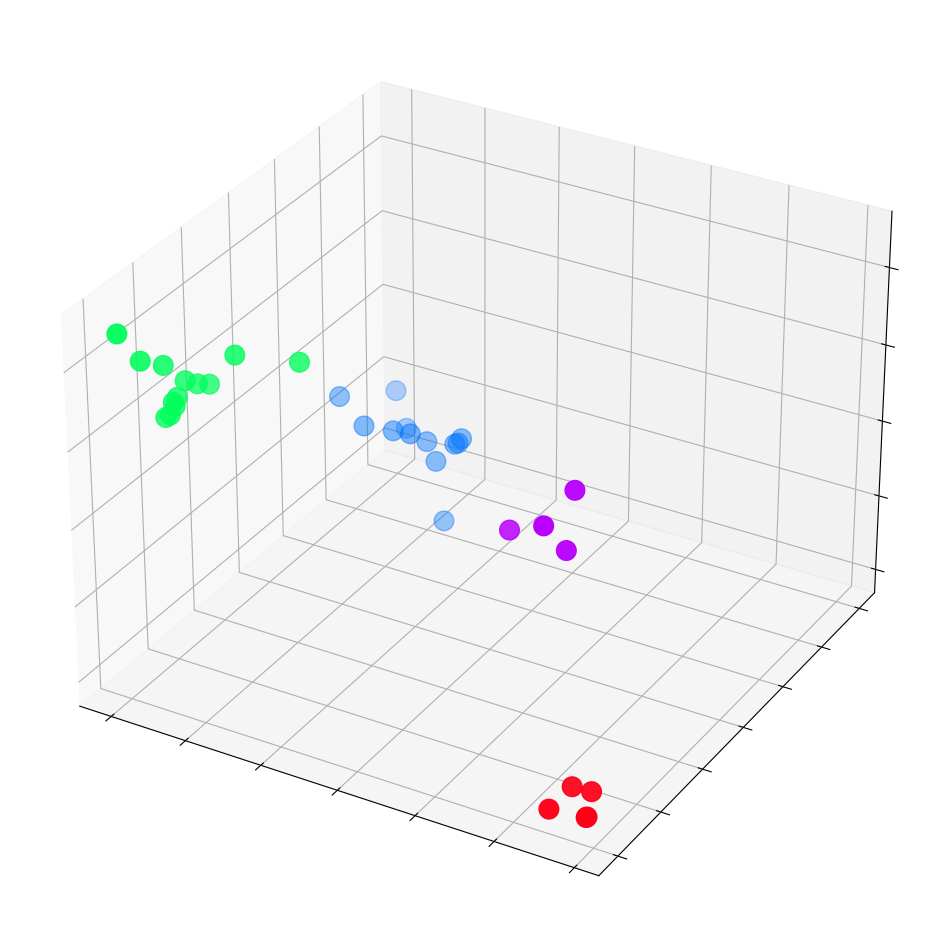

In [39]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.patch.set_alpha(0)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)
plt.show()

In [43]:
def animate(i):
    embed = embeddings[i].detach().cpu().numpy()
    ax.clear()
    ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=40)



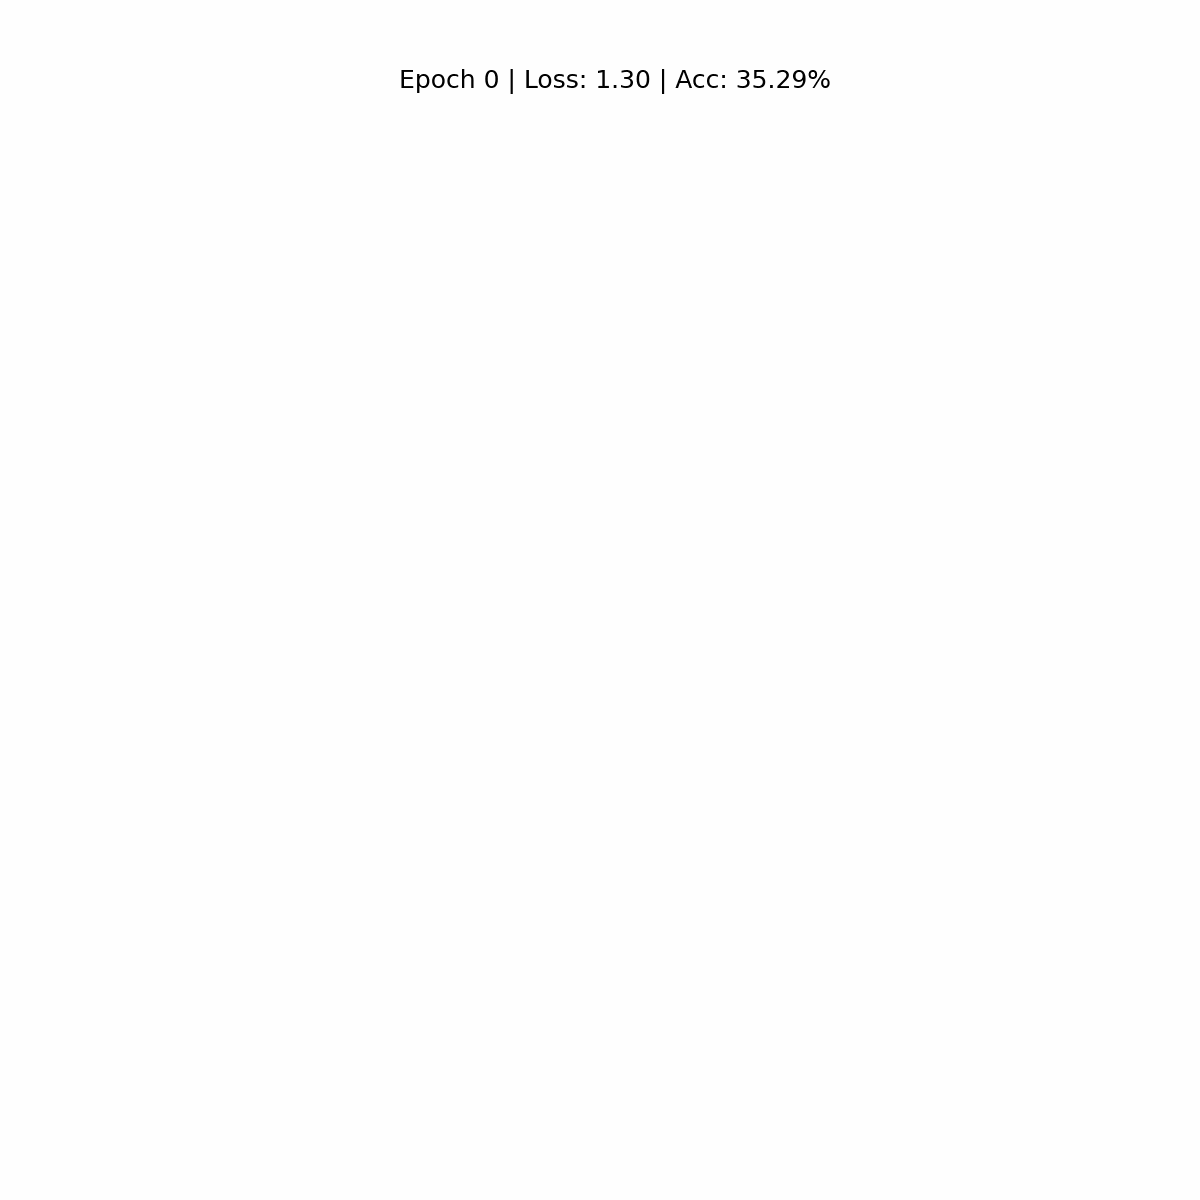

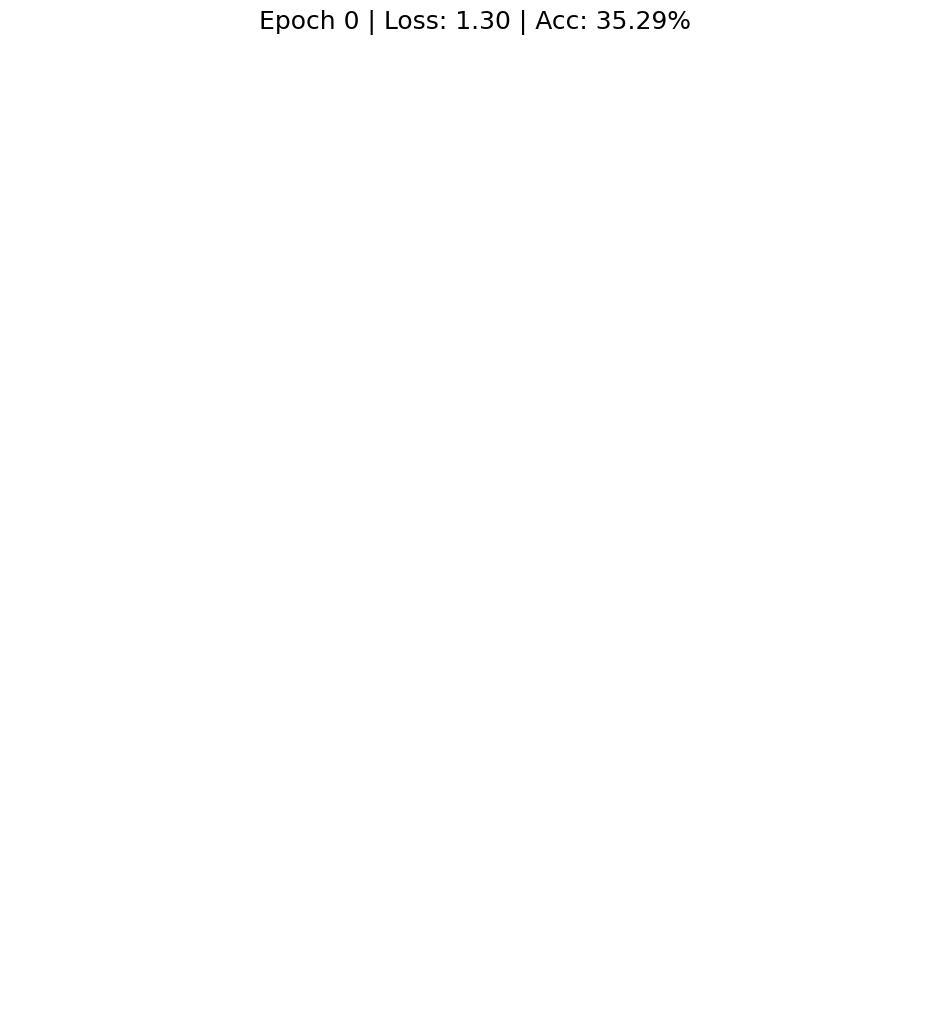

In [44]:
fig = plt.figure(figsize=(12, 12))
plt.axis('off')

anim = animation.FuncAnimation(fig, animate, \
              np.arange(0, 200, 10), interval=800, repeat=True)

# Optionally, display the GIF in Jupyter Notebook
from IPython.display import Image
display(Image(filename="animation2.gif"))

In [ ]:
fig = plt.figure(figsize=(12, 12))
plt.axis('off')
ax = fig.add_subplot(projection='3d')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
anim = animation.FuncAnimation(fig, animate, \
              np.arange(0, 200, 10), interval=800, repeat=True)
html = HTML(anim.to_html5_video())
display(html)